In [ ]:
# Load it from previous run

import os
from dotenv import load_dotenv
import openai

# Load the environment variables from the specified .env file
dotenv_path = '/home/zihan/Desktop/Manufacturing_QA/Experimental_Code/GraphRag/.env'
load_dotenv(dotenv_path)

# Load the OpenAI API key from the environment variable
api_key = os.getenv('GRAPHRAG_API_KEY')
assert api_key is not None, "OpenAI API key not found in environment variables."

openai.api_key = api_key


import qdrant_client
from llama_index.core import SimpleDirectoryReader
from llama_index.vector_stores.qdrant import QdrantVectorStore
from llama_index.core import VectorStoreIndex, StorageContext
from llama_index.core.indices import MultiModalVectorStoreIndex

# Create a local Qdrant vector store
client = qdrant_client.QdrantClient(path="qdrant_d_0")

text_store = QdrantVectorStore(
    client=client, collection_name="text_collection_0"
)
image_store = QdrantVectorStore(
    client=client, collection_name="image_collection_0"
)
storage_context = StorageContext.from_defaults(
    vector_store=text_store, image_store=image_store, persist_dir="./storage"
)

from llama_index.core import load_index_from_storage
index = load_index_from_storage(storage_context, image_store=image_store)

### Single Query test

**Node ID:** f26e92a1-b5b5-45ac-9f85-0ee978470b5e<br>**Similarity:** 0.8617441071757059<br>**Text:** In addition, the joint must be designed to exploit the particular  strengths of adhesive bonding and avoid its limitations.  

# 30.3.1  JOINT DESIGN  

Adhesive joints are not generally as strong as those by welding, brazing, or solder- ing. Accordingly, consideration must be given to the design of joints that are adhe- sively bonded. The following design principles are applicable: (1) Joint contact area  should be maximized. (2) Adhesive joints are strongest in shear and tension as in  Figure 30.10(a) and (b), and joints should be designed so that the applied stresses  are of these types. (3) Adhesive bonded joints are weakest in cleavage or peeling as  in Figure 30.10(c) and (d), and adhesive bonded joints should be designed to avoid  these types of stresses.  

Typical joint designs for adhesive bonding that illustrate these design principles  are presented in Figure 30.11. Some joint designs combine adhesive bonding with  other joining methods to increase strength and/or provid...<br>

----------------------------------------


**Node ID:** a7cd9b74-1a9f-4ae2-83e5-b46eab16bc06<br>**Similarity:** 0.8155191923006793<br>**Text:** Bitumen, an asphalt adhesive, was used in an- cient times as a cement and mortar for construction  in Asia Minor. The Romans used pine wood tar and  beeswax to caulk their ships. Glues derived from ﬁ  sh,  stag horns, and cheese were used in the early centu- ries after Christ for assembling components of wood. In more modern times, adhesives have become  an important joining process. Plywood, which relies  on the use of adhesives to bond multiple layers of  wood, was developed around 1900. Phenol formal- dehyde was the ﬁ  rst synthetic adhesive developed,  around 1910, and its primary use was in bonding of  wood products such as plywood. During World War II,  phenolic resins were developed for adhesive bonding  of certain aircraft components. In the 1950s, epoxies  were ﬁ  rst formulated. And since the 1950s a variety  of additional adhesives have been developed, includ- ing anaerobics, various new polymers, and second- generation acrylics.  

Adhesive bonding  is a joining process ...<br>

----------------------------------------


**Node ID:** ddd6a88f-013a-4a89-abd2-3add3b008c4a<br>**Similarity:** 0.8022100865826698<br>**Text:** [](images/4fa9287e7e474f4387d790a053742a087536a2b5fe6d46af83a3ed15bed0f89e.jpg)  
FIGURE 3.10  Bending of a rectangular cross section results in both tensile and compressive stresses in the  material: (1) initial loading; (2) highly stressed and strained specimen; and (3) bent part.  

load. These materials do not respond well to traditional tensile testing because of  problems in preparing the test specimens and possible misalignment of the press  jaws that hold the specimen. The  bending test  (also known as the  ﬂ  exure test ) is  used to test the strength of these materials, using a setup illustrated in the ﬁ  rst  diagram in Figure 3.10. In this procedure, a specimen of rectangular cross section  is positioned between two supports, and a load is applied at its center. In this con- ﬁ  guration, the test is called a three-point bending test. A four-point conﬁ  guration  is also sometimes used. These brittle materials do not ﬂ  ex to the exaggerated ex- tent shown in Figure 3.10;...<br>

----------------------------------------


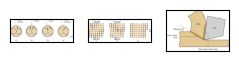

In [2]:
"""Single Query test"""


from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
import os

def plot_images(image_paths):
    images_shown = 0
    for img_path in image_paths:
        if os.path.isfile(img_path):
            image = Image.open(img_path).convert("RGB")

            plt.subplot(8, 8, images_shown + 1)
            plt.imshow(image)
            plt.xticks([])
            plt.yticks([])
            
            images_shown += 1
            if images_shown >= 64:
                break

    plt.tight_layout()
    plt.show()


from llama_index.core.response.notebook_utils import display_source_node
from llama_index.core.schema import ImageNode
test_query = "Adhesively bonded joints are strongest under which type of stresses (pick two best answers): (a) cleavage, (b) peeling, (c) shear, and (d) tension."
# generate  retrieval results
retriever = index.as_retriever(similarity_top_k=3, image_similarity_top_k=3)
retrieval_results = retriever.retrieve(test_query)

retrieved_image = []
for res_node in retrieval_results:
    if isinstance(res_node.node, ImageNode):
        retrieved_image.append(res_node.node.metadata["file_path"])
    else:
        display_source_node(res_node, source_length=1000)
        print("----"*10)
plot_images(retrieved_image)

In [3]:
retrieval_results

[NodeWithScore(node=TextNode(id_='f26e92a1-b5b5-45ac-9f85-0ee978470b5e', embedding=None, metadata={'file_path': '/home/zihan/Desktop/Manufacturing_QA/BookData/FullBook_HighQuality/sec30.txt', 'file_name': 'sec30.txt', 'file_type': 'text/plain', 'file_size': 41401, 'creation_date': '2024-08-24', 'last_modified_date': '2024-08-24'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={<NodeRelationship.SOURCE: '1'>: RelatedNodeInfo(node_id='82d5254a-6ae3-4f58-b47b-358d9e4a4662', node_type=<ObjectType.DOCUMENT: '4'>, metadata={'file_path': '/home/zihan/Desktop/Manufacturing_QA/BookData/FullBook_HighQuality/sec30.txt', 'file_name': 'sec30.txt', 'file_type': 'text/plain', 'file_size': 41401, 'creation_date': '2024-08-24', 'last_modified_date': '2024-08-24'}, hash='37857da5

['/home/zihan/Desktop/Manufacturing_QA/BookData/FullBook_HighQuality/87da55401deee2b0c207b53858e19154e609cd7e60f29bc5d433ec339f6cd7d8.jpg', '/home/zihan/Desktop/Manufacturing_QA/BookData/FullBook_HighQuality/9788393f5c4e9e1eaa0ea03befff42bbb7366c00fcde4516c497d28b1c4e9442.jpg', '/home/zihan/Desktop/Manufacturing_QA/BookData/FullBook_HighQuality/9786dbb422a25eb92ac37ae329d75ca2a4136b5d8e55503c8c225c004f03254b.jpg', '/home/zihan/Desktop/Manufacturing_QA/BookData/FullBook_HighQuality/91287c58062afaeea2f39c89df9b91a6c46d2f8107e6f5402056de3489c60705.jpg', '/home/zihan/Desktop/Manufacturing_QA/BookData/FullBook_HighQuality/54903b7bc86140704dc9a1b301a1623b6698845dbec06069b59ac3b86084a573.jpg']


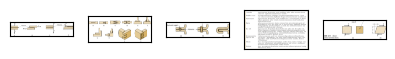

In [56]:
'''Step 1: Extract Image Links from Text'''
import re

def extract_image_links(text):
    pattern = r'!\[\]\((.*?)\)'
    return re.findall(pattern, text)


images_link = []
context_str = ""
for res_node in retrieval_results:
    if isinstance(res_node.node, ImageNode):
        pass
    else:
        text = res_node.node.text
        context_str += text
        images_link += extract_image_links(text)



# Base folder where the book data: text and images are stored 
base_folder = '/home/zihan/Desktop/Manufacturing_QA/BookData/FullBook_HighQuality'

# Step 2: Modify paths to correct image paths
def full_image_paths(image_links, base_folder):
    text_extracted_images = []
    for img_path in image_links:
        # Remove 'images/' from the beginning of the path if it exists
        if img_path.startswith('images/'):
            img_path = img_path[len('images/'):]  # Remove 'images/' from the path
            full_path = os.path.join(base_folder, img_path)
        if not os.path.isfile(full_path):
            print(f"File not found: {full_path}")
        text_extracted_images.append(full_path)
    return text_extracted_images

# Get full image paths
text_extracted_images = full_image_paths(images_link, base_folder)
print(text_extracted_images)


# Plot the images with full paths
plot_images(text_extracted_images)

In [53]:
all_images = retrieved_image + text_extracted_images
all_images

['/home/zihan/Desktop/Manufacturing_QA/BookData/FullBook_HighQuality/2a4cea0c373ac80ae77ece6aab83b4be279624aefb8325f99945639523350532.jpg',
 '/home/zihan/Desktop/Manufacturing_QA/BookData/FullBook_HighQuality/573d4cd81a3b8ed6ddb1155a0bd464c0bcc85081a1ec81abacfc064218b7ff7f.jpg',
 '/home/zihan/Desktop/Manufacturing_QA/BookData/FullBook_HighQuality/064528c4454ce68e9fe70bbd50f9eb7bc7b95f21af0d34869567572ef4951bf9.jpg',
 '/home/zihan/Desktop/Manufacturing_QA/BookData/FullBook_HighQuality/87da55401deee2b0c207b53858e19154e609cd7e60f29bc5d433ec339f6cd7d8.jpg',
 '/home/zihan/Desktop/Manufacturing_QA/BookData/FullBook_HighQuality/9788393f5c4e9e1eaa0ea03befff42bbb7366c00fcde4516c497d28b1c4e9442.jpg',
 '/home/zihan/Desktop/Manufacturing_QA/BookData/FullBook_HighQuality/9786dbb422a25eb92ac37ae329d75ca2a4136b5d8e55503c8c225c004f03254b.jpg',
 '/home/zihan/Desktop/Manufacturing_QA/BookData/FullBook_HighQuality/91287c58062afaeea2f39c89df9b91a6c46d2f8107e6f5402056de3489c60705.jpg',
 '/home/zihan/Deskto

In [65]:
prompt_templae = (
    """You are a top student in manufacturing major. You are in an exam and you need to answer the following MCQ based on the context provided and what you know regarding manufacturing processes and materials correctly.
Please think step by step then choose the correct answer(s) carefully as your final answer, remember you need to provide the letter choice. Providing only the context choice will result in zero even if it is correct:\n

You must provide answer in the following format:

"Explanation": "Your explanation here.", "YourChoice": "A"

{context_str}\n
Answer the following question:
Query: {query_str}\n
Answer: """
)

prompt = prompt_templae.format(context_str=context_str, query_str=test_query)

In [66]:
import os
import base64
from openai import OpenAI

def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

def generate_response(query, image_paths):
    client = OpenAI(api_key=api_key)
    # Encode images
    encoded_images = [encode_image(img_path) for img_path in image_paths]
    
    # Construct the messages for the GPT-4 model
    messages = [
        {
            "role": "user",
            "content": [
                {"type": "text", "text": query},
                *[{"type": "image_url", "image_url": {"url": f"data:image/jpeg;base64,{img}"}} for img in encoded_images]
            ]
        }
    ]
    
    # Call the OpenAI API
    response = client.chat.completions.create(
        model="gpt-4o",
        messages=messages,
        max_tokens=4000
    )
    
    return response.choices[0].message.content


"Explanation": Adhesively bonded joints are generally strongest under shear and tension stresses. Shear stress (option c) distributes the force uniformly across the bond line, maximizing the adhesive contact area which enhances the bond strength. Tension stress (option d) pulls across the bond line, which similarly allows the adhesive to retain a strong grip. Cleavage and peeling forces tend to concentrate stress at a single edge, which can initiate fracture or failure at the bond. 

"YourChoice": "C, D"


### Put everything together: Quick Test

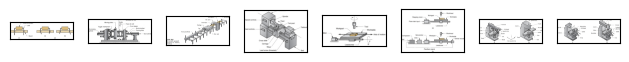

['/home/zihan/Desktop/Manufacturing_QA/BookData/FullBook_HighQuality/2eb8e990cafaa6450db1808128146225667fa2a25202cd0cc857c35ad12469de.jpg', '/home/zihan/Desktop/Manufacturing_QA/BookData/FullBook_HighQuality/e3f534d2d950de911661e0d30985d7b003ab667c061ed6e05150fff87f6abc10.jpg', '/home/zihan/Desktop/Manufacturing_QA/BookData/FullBook_HighQuality/0cdd0aeaae37bcabb1ec116ba35f80e866b715c4afaf1b6ec57a643ee6bfd261.jpg', '/home/zihan/Desktop/Manufacturing_QA/BookData/FullBook_HighQuality/ed595687bb3fd9a1f8cdb7606bcbb50d129aceac0f6d6ffb748563290d217d5e.jpg', '/home/zihan/Desktop/Manufacturing_QA/BookData/FullBook_HighQuality/0a347d2991f8bb0cd63704f6624f3161c7be91b8085666ae06749f38ea04de9e.jpg', '/home/zihan/Desktop/Manufacturing_QA/BookData/FullBook_HighQuality/b45d9cd535ef2534ea73c7b1dfb9b6f8a339a9b1f78008c58d43d53c5a2cfd13.jpg', '/home/zihan/Desktop/Manufacturing_QA/BookData/FullBook_HighQuality/b4932a4d5e9e13587330567bfd44b5656e7efe22955d2844a157c68747fb03dd.jpg', '/home/zihan/Desktop/Manuf

In [15]:
"""Put everything together"""
import re
import os
import base64
from openai import OpenAI
from llama_index.core.schema import ImageNode
from PIL import Image
import matplotlib.pyplot as plt

def plot_images(image_paths):
    images_shown = 0
    for img_path in image_paths:
        if os.path.isfile(img_path):
            image = Image.open(img_path).convert("RGB")

            plt.subplot(8, 8, images_shown + 1)
            plt.imshow(image)
            plt.xticks([])
            plt.yticks([])
            
            images_shown += 1
            if images_shown >= 64:
                break

    plt.tight_layout()
    plt.show()


def extract_image_links(text):
    pattern = r'!\[\]\((.*?)\)'
    return re.findall(pattern, text)


# Step 2: Modify paths to correct image paths
def full_image_paths(image_links, base_folder):
    text_extracted_images = []
    for img_path in image_links:
        # Remove 'images/' from the beginning of the path if it exists
        if img_path.startswith('images/'):
            img_path = img_path[len('images/'):]  # Remove 'images/' from the path
            full_path = os.path.join(base_folder, img_path)
        if not os.path.isfile(full_path):
            print(f"File not found: {full_path}")
        text_extracted_images.append(full_path)
    return text_extracted_images

def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

def generate_response(query, image_paths):
    client = OpenAI(api_key=api_key)
    # Encode images
    encoded_images = [encode_image(img_path) for img_path in image_paths]
    
    # Construct the messages for the GPT-4 model
    messages = [
        {
            "role": "user",
            "content": [
                {"type": "text", "text": query},
                *[{"type": "image_url", "image_url": {"url": f"data:image/jpeg;base64,{img}"}} for img in encoded_images]
            ]
        }
    ]
    
    # Call the OpenAI API
    response = client.chat.completions.create(
        model="gpt-4o",
        messages=messages,
        max_tokens=4000
    )
    
    return response.choices[0].message.content


def QA(question, image_folder, top_k = 3, image_top_k=3, show_images=False, show_context=False):
    retriever = index.as_retriever(similarity_top_k=top_k, image_similarity_top_k=image_top_k)
    retrieval_results = retriever.retrieve(question)

    images_link = []
    retrieved_images = []
    context_str = ""
    for res_node in retrieval_results:
        if isinstance(res_node.node, ImageNode):
            retrieved_images.append(res_node.node.metadata["file_path"])
        else:
            text = res_node.node.text
            context_str += text
            images_link += extract_image_links(text)

    # Get full image paths
    text_extracted_images = full_image_paths(images_link, image_folder)
    all_images = retrieved_images + text_extracted_images

    if show_images:
        plot_images(all_images)
        print('Images path:\n',all_images)
    if show_context:
        print(context_str)

    prompt_templae = (
        """You are a top student in manufacturing major. You are in an exam and you need to answer the following MCQ based on the context provided and what you know regarding manufacturing processes and materials correctly.
    Please think step by step then choose the correct answer(s) carefully as your final answer, remember you need to provide the letter choice. Providing only the context choice will result in zero even if it is correct:\n

    You must provide answer in the following format:

    "Explanation": "Your explanation here.", "YourChoice": "A"

    {context_str}\n
    Answer the following question:
    Query: {query_str}\n
    Answer: """
    )
    prompt = prompt_templae.format(context_str=context_str, query_str=question)
    result = generate_response(prompt, all_images)
    print(result)
    return result



if __name__ == "__main__":
    question = "Is there a figure that demonstrates how the carriage and cross-slide are positioned in relation to the lathe bed?"
    image_folder = '/home/zihan/Desktop/Manufacturing_QA/BookData/FullBook_HighQuality'
    result = QA(question, image_folder, top_k = 3, image_top_k=3, show_images=True, show_context=True)




## The following section provide idea about how first convert images to summary and then replace the old document to make multimodal to language only

In [ ]:

'''
Step 2: Generate Captions for Images
We'll use an image captioning model from the transformers library, such as BLIP. This model can generate a caption for a given image.
'''
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image

# Load the BLIP model and processor
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

def generate_caption(image_path):
    raw_image = Image.open(image_path).convert('RGB')
    inputs = processor(raw_image, return_tensors="pt")
    out = model.generate(**inputs)
    caption = processor.decode(out[0], skip_special_tokens=True)
    return caption


'''
Step 3: Replace Image Links with Captions
We'll replace each image link in your text with the corresponding generated caption.
'''
def replace_images_with_captions(text):
    pattern = r'!\[\]\((.*?)\)'
    matches = re.findall(pattern, text)
    for image_path in matches:
        caption = generate_caption(image_path)
        # Replace the image link with the caption
        text = text.replace(f'![]({image_path})', f'[Image: {caption}]')
    return text



'''
Step 4: Rebuild the Index with Modified Text
We'll process your documents to replace image links with captions and then rebuild the index.
'''
from llama_index import GPTVectorStoreIndex, SimpleDirectoryReader

# Load your documents
documents = SimpleDirectoryReader('path_to_your_text_files').load_data()

# Process each document
for doc in documents:
    doc.text = replace_images_with_captions(doc.text)

# Build the index with the modified documents
index = GPTVectorStoreIndex.from_documents(documents)

'''
Step 5: Proceed with Querying
Now, you can use your query engine as before.
'''

from llama_index.multi_modal_llms.openai import OpenAIMultiModal
from llama_index import PromptTemplate

OPENAI_API_KEY = api_key
os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY

openai_mm_llm = OpenAIMultiModal(
    model="gpt-4", api_key=OPENAI_API_KEY, max_new_tokens=4000
)

qa_tmpl_str = (
    """You are a top student in manufacturing major. You are in an exam and you need to answer the following MCQ based on the context provided and what you know regarding manufacturing processes and materials correctly.
Please think step by step then choose the correct answer(s) carefully as your final answer, remember you need to provide the letter choice. Providing only the context choice will result in zero even if it is correct:\n

You must provide answer in the following format:

"Explanation": "Your explanation here.", "YourChoice": "A"

{context_str}\n
Answer the following question:
Query: {query_str}\n
Answer: """
)
qa_tmpl = PromptTemplate(qa_tmpl_str)

query_engine = index.as_query_engine(
    llm=openai_mm_llm, text_qa_template=qa_tmpl
)

test_query = """In the iron-iron carbide phase diagram of Figure 6.4, identify the phase or phases present at the following temperatures and nominal compositions: (c) 1095°C (2000°F) and 1% Fe3C"""

try:
    result = query_engine.query(test_query)
    print(result)
except RuntimeError as e:
    if 'too long for context length' in str(e):
        result = "No output, likely because the input context is too long"
        print(result)
    else:
        raise e



